In [1]:
import bilby
import numpy as np
from scipy.integrate import quad
from ler import LeR
import json
import matplotlib.pyplot as plt
%matplotlib inline

# for generating mass distribution
from gwcosmo import priors as p

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


## BNS mass model chosen (ALSING)

In [33]:
ler = LeR(npool=int(4),z_min=0., z_max=10., batch_size=25000,
    m_min=1., 
    m_max=3.,
    event_type='BNS',
    category='popI_II',
    sub_category='Alsing',
    spin_constant=0.,
    mtot_min=2., 
    mtot_max=18., 
    nsamples_mtot=50, 
    nsamples_mass_ratio=100, 
    sampling_frequency=2048.,
    waveform_approximant = 'TaylorF2', 
    minimum_frequency = 20., 
    snr_type = 'interpolation', 
    waveform_inspiral_must_be_above_fmin=False,
    interpolator_dir="../interpolator_pickle")

Given: Inspiral waveform, TaylorF2.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ../interpolator_pickle/L1/halfSNR_dict_1.pickle
Interpolator will be loaded for H1 detector from ../interpolator_pickle/H1/halfSNR_dict_1.pickle
Interpolator will be loaded for V1 detector from ../interpolator_pickle/V1/halfSNR_dict_1.pickle


## Sampling (Unlensed)

In [35]:
# sample unlensed parameters
ler.batch_size = 50000
ler.unlensed_cbc_statistics(nsamples=1000000, json_file="./unlensed_params_BNS_Alsing_1M.json");

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...
Batch no. 5
sampling gw source params...
calculating snrs...
Batch no. 6
sampling gw source params...
calculating snrs...
Batch no. 7
sampling gw source params...
calculating snrs...
Batch no. 8
sampling gw source params...
calculating snrs...
Batch no. 9
sampling gw source params...
calculating snrs...
Batch no. 10
sampling gw source params...
calculating snrs...
Batch no. 11
sampling gw source params...
calculating snrs...
Batch no. 12
sampling gw source params...
calculating snrs...
Batch no. 13
sampling gw source params...
calculating snrs...
Batch no. 14
sampling gw source params...
calculating snrs...
Batch no. 15
sampling gw s

## Looking at the Mass distribution (Alsing)

In [36]:
ler.gw_param = "unlensed_params_BNS_Alsing_1M.json"
ler.gw_param.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'opt_snr_net', 'L1', 'H1', 'V1'])

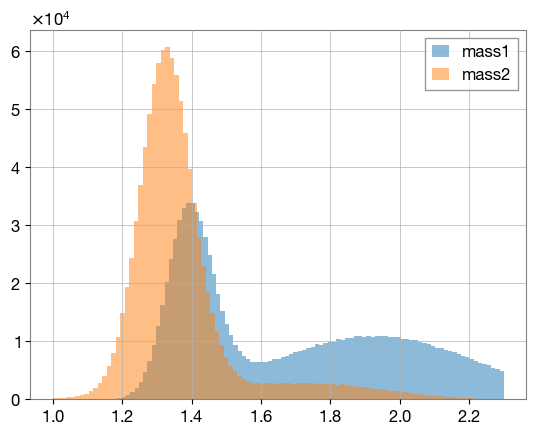

In [37]:
# plot mass_1, mass_2 (source frame)
mass1 = ler.gw_param['mass_1_source']
mass2 = ler.gw_param['mass_2_source']
plt.hist(mass1, bins=100, alpha=0.5, label='mass1')
plt.hist(mass2, bins=100, alpha=0.5, label='mass2')
plt.legend()
plt.show()

## Looking at the redshift distribution

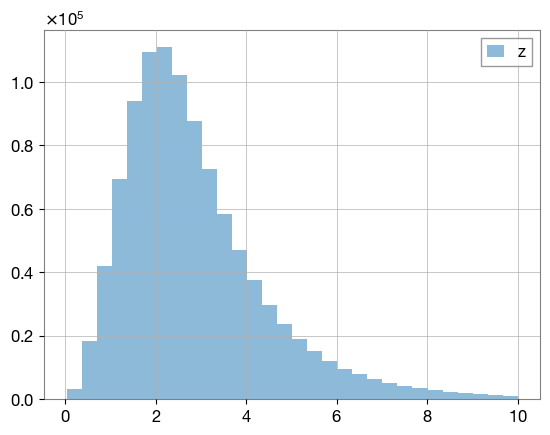

In [39]:
# redshift distribution
z = ler.gw_param['zs']

# plot redshift distribution
plt.hist(z, bins=30, alpha=0.5, label='z')
plt.legend()
plt.show()

## Sampling (lensed)

In [42]:
# sample lensed parameters
lensed_param = ler.lensed_cbc_statistics(nsamples=1000000, json_file="./lensed_params_BNS_Alsing_1M.json", resume=True);

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./lensed_params_BNS_Alsing_1M.json
Batch no. 17
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:11<00:00, 4545.00it/s]


calculating snrs...
Batch no. 18
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4618.75it/s]


calculating snrs...
Batch no. 19
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4641.55it/s]


calculating snrs...
Batch no. 20
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4585.27it/s]


calculating snrs...


### 2 image should cross $SNR_{th}=8.$ 

In [71]:
# rates
unlensed_rate = ler.unlensed_rate(gw_param='./unlensed_params_BNS_Alsing_1M.json',
    snr_threshold=8.0,
    jsonfile='./unlensed_params_detectable_BNS_Alsing_1M.json',)

getting gw_params from json file ./unlensed_params_BNS_Alsing_1M.json...
total unlensed rate (yr^-1) (with step function): 3.315079809880175
storing detectable unlensed params in ./unlensed_params_detectable_BNS_Alsing_1M.json


In [72]:
# lensed rates
lensed_rate = ler.lensed_rate(lensed_param='./lensed_params_BNS_Alsing_1M.json',
    jsonfile='./lensed_params_detectable_BNS_Alsing_1M.json',)

getting lensed_param from json file ./lensed_params_BNS_Alsing_1M.json...
total lensed rate (yr^-1) (with step function): 0.004029233084008694
storing detectable lensed params in ./lensed_params_detectable_BNS_Alsing_1M.json...


In [73]:
ler.rate_comparision();

unlensed_rate: 3.315079809880175
lensed_rate: 0.004029233084008694
ratio: 822.7570211902444


In [74]:
# get dict data from json file
with open('./lensed_params_detectable_BNS_Alsing_1M.json') as f:
    data = json.load(f)

# arrange in decending order across each row of snr
data['opt_snr_net'] = np.array(data['opt_snr_net'])
data['opt_snr_net'] = -np.sort(-data['opt_snr_net'], axis=1)

print("number of events with 1st image SNR > 8: ", np.sum(data['opt_snr_net'][:,0]>8))
print("number of events with 2nd image SNR > 8: ", np.sum(data['opt_snr_net'][:,1]>8))
print("number of events with 3rd image SNR > 8: ", np.sum(data['opt_snr_net'][:,2]>8))
print("number of events with 4th image SNR > 8: ", np.sum(data['opt_snr_net'][:,3]>8))

number of events with 1st image SNR > 8:  35
number of events with 2nd image SNR > 8:  35
number of events with 3rd image SNR > 8:  1
number of events with 4th image SNR > 8:  0


## $SNR_{th}=4.$ 

In [61]:
# two of the four images have SNR > 8
unlensed_rate = ler.unlensed_rate(gw_param='./unlensed_params_BNS_Alsing_1M.json',
    snr_threshold=4.0,
    jsonfile='./unlensed_params_detectable_BNS_Alsing_1M.json',)

getting gw_params from json file ./unlensed_params_BNS_Alsing_1M.json...
total unlensed rate (yr^-1) (with step function): 24.973601234430646
storing detectable unlensed params in ./unlensed_params_detectable_BNS_Alsing_1M.json


In [64]:
# lensed rates
lensed_rate = ler.lensed_rate(lensed_param='./lensed_params_BNS_Alsing_1M.json',
    jsonfile='./lensed_params_detectable_BNS_Alsing_1M.json',
    snr_threshold=4.0,
    num_img=2,)

getting lensed_param from json file ./lensed_params_BNS_Alsing_1M.json...
total lensed rate (yr^-1) (with step function): 0.03902600044225565
storing detectable lensed params in ./lensed_params_detectable_BNS_Alsing_1M.json...


In [65]:
ler.rate_comparision();

unlensed_rate: 24.973601234430646
lensed_rate: 0.03902600044225565
ratio: 639.922127592412


In [69]:
# get dict data from json file
with open('./lensed_params_detectable_BNS_Alsing_1M.json') as f:
    data = json.load(f)

# arrange in decending order across each row of snr
data['opt_snr_net'] = np.array(data['opt_snr_net'])
data['opt_snr_net'] = -np.sort(-data['opt_snr_net'], axis=1)

print("number of events with 1st image SNR > 4: ", np.sum(data['opt_snr_net'][:,0]>4))
print("number of events with 2nd image SNR > 4: ", np.sum(data['opt_snr_net'][:,1]>4))
print("number of events with 3rd image SNR > 4: ", np.sum(data['opt_snr_net'][:,2]>4))
print("number of events with 4th image SNR > 4: ", np.sum(data['opt_snr_net'][:,3]>4))

number of events with 1st image SNR > 4:  339
number of events with 2nd image SNR > 4:  339
number of events with 3rd image SNR > 4:  22
number of events with 4th image SNR > 4:  4


* very less likely to be detected (4th image)

## Comaprision

In [76]:
# How much improvement
# comparing number detectable lensed images with SNR_th > 4 and SNR_th > 8 (on the condition that at least two images have SNR_th)
339/35

9.685714285714285

In [1]:
339/35

9.685714285714285

* almost 10 times improvement
* if we consider SNR_th=8, 304 events out of 339 events are sub-threshold events (4<SNR<8) 

# Combine SNR across images

In [2]:
import json 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# get dict data from json file
with open('./lensed_params_BNS_Alsing_1M.json') as f:
    data = json.load(f)

In [4]:
# selecting 4 image case
snr = np.array(data["opt_snr_net"])
# nan to zero
snr[np.isnan(snr)] = 0
# each row in decending order
snr = -np.sort(-snr, axis=1)
# squared and sum each elements in a row
snr_sum = np.sum(snr**2, axis=1)
# take sqrt
snr_sum = np.sqrt(snr_sum)

snr_threshold = 4.

# boolean array for snr_sum > snr_threshold
snr_hit = snr_sum > snr_threshold
print("total hits (snr combine): ", np.sum(snr_hit))


total hits (snr combine):  2019


In [5]:
# when snr not combine
snr_hit = snr[:,1] > snr_threshold
print("total hits (snr not combine): ", np.sum(snr_hit))

total hits (snr not combine):  339


In [18]:
153/35  # SNRth=8

4.371428571428571

In [6]:
2019/339  # SNRth=4

5.95575221238938

* only 4 times improvement

## 4 image case
### 4 image combined SNR

In [9]:
# detectable lensed events
f = open('./lensed_params_BNS_Alsing_1M.json', "r")
lensed_param = json.loads(f.read())

In [10]:
size = len(snr)
snr_threshold = 8.

In [11]:
# for 1M samples
# Dimensions are (nsamples, n_max_images)
# select 4 image case only, where there are no nan in the row
snr = np.array(lensed_param["opt_snr_net"])
snr_nan = np.isnan(snr)
snr_nan_sum = np.sum(snr_nan, axis=1)
snr_4image = snr_nan_sum == 0
snr = np.array(snr[snr_4image])

In [12]:
# squared and add up snr in each row, and then take sqrt
snr = snr**2
snr = np.sum(snr, axis=1)
snr = np.sqrt(snr)

# boolean array for snr_sum > snr_threshold
snr_hit = snr > snr_threshold

print("total snr hits (SNR combine): ", np.sum(snr_hit))

total snr hits (SNR combine):  122


## 4 image case
### 4 image seperate SNR

In [13]:
# for 1M samples
# Dimensions are (nsamples, n_max_images)
# select 4 image case only, where there are no nan in the row
snr = np.array(lensed_param["opt_snr_net"])
snr_nan = np.isnan(snr)
snr_nan_sum = np.sum(snr_nan, axis=1)
snr_4image = snr_nan_sum == 0
snr = np.array(snr[snr_4image])

In [14]:
# all image should be greater than threshold
snr_hit = np.sum(snr > snr_threshold, axis=1) == 4

print("total snr hits (SNR not combine): ", np.sum(snr_hit))

total snr hits (SNR not combine):  0


In [77]:
1599/4

399.75

In [15]:
### 754 events3XG https://arxiv.org/pdf/2307.10421.pdf
1/1681 * 754 


0.4485425342058299

## FAP 

In [35]:
oneyear = 365*24*60*60  # in seconds
N = 1000000  # number of false alarm per year with that SNR threshold
FAP2s = 1 - np.exp(-N*(2/oneyear)) 

In [36]:
1 - np.exp(-N*(oneyear/oneyear))

1.0

In [37]:
FAP2s

0.061450409299570685

In [41]:
FAP2s*FAP2s*FAP2s

0.00023204613532727984

In [40]:
FAP2s*FAP2s*FAP2s*FAP2s

1.4259329992244915e-05

In [33]:
63*63

3969

### Einstein radius

In [79]:
# get dict data from json file
with open('./lensed_params_BNS_Alsing_1M.json') as f:
    data = json.load(f)

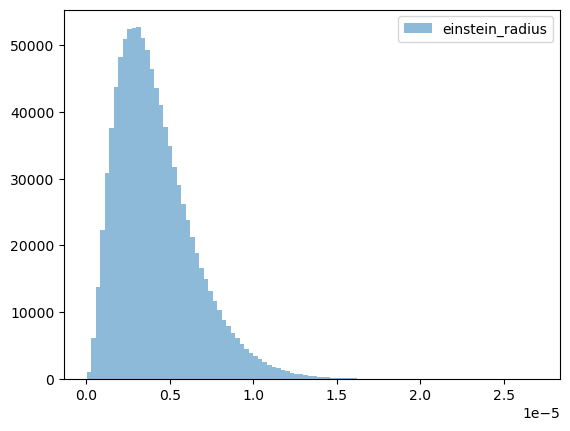

In [83]:
# plot the einshtein radius
# all , detectatble+undetectable
plt.hist(data['theta_E'], bins=100, alpha=0.5, label='einstein_radius')
plt.legend()
plt.show()


In [84]:
# get dict data from json file
with open('./lensed_params_detectable_BNS_Alsing_1M.json') as f:
    data = json.load(f)

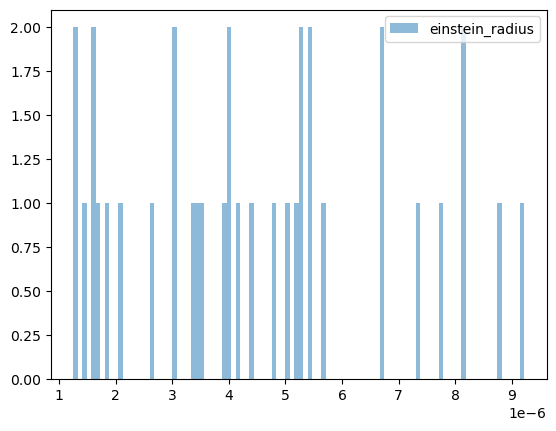

In [85]:
# plot the einshtein radius
# detectatble only
plt.hist(data['theta_E'], bins=100, alpha=0.5, label='einstein_radius')
plt.legend()
plt.show()

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_44576/3006689822.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(np.array(data['time_delays']).flatten()), bins=100, alpha=0.5, label='time_delay')


ValueError: supplied range of [-inf, 7.090534799673374] is not finite

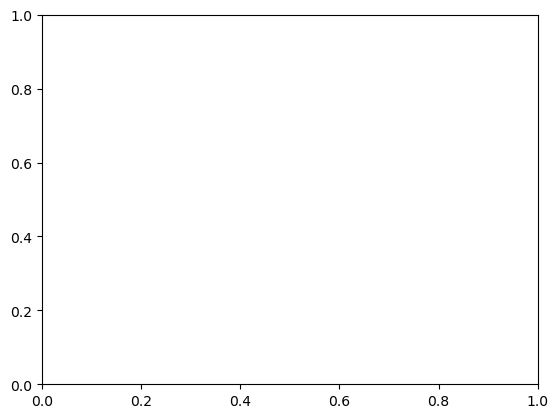

In [93]:
# plot time delay
# only detectable
plt.hist(np.log10(np.array(data['time_delays']).flatten()), bins=100, alpha=0.5, label='time_delay')
plt.legend()
plt.show()

In [87]:
10**-5 * 3600

0.036000000000000004

In [88]:
10**-6 * 3600

0.0036

In [99]:
np.log10(np.nan_to_num(np.array(data['time_delays']).flatten()))

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_44576/1770458884.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.nan_to_num(np.array(data['time_delays']).flatten()))


array([      -inf, 5.57372007, 5.57372012, 6.0702848 ,       -inf,
       6.48430767, 6.48436446, 6.56473701,       -inf, 4.73650101,
       4.75621447, 5.44415866,       -inf, 5.57680066, 5.57680085,
       5.96370748,       -inf, 3.69640511, 3.69656556,       -inf,
             -inf, 6.47652835, 6.47654729, 6.59415484,       -inf,
       3.09012482, 3.09051946, 4.98546651,       -inf, 6.73380375,
       6.7338056 , 6.73950306,       -inf, 3.29784862, 3.36047694,
       5.85863568,       -inf, 4.89556642, 4.89573062, 5.20307958,
             -inf, 4.88200343, 4.88200581, 7.06086491,       -inf,
       6.24437165, 6.24437186, 6.24606173,       -inf, 6.82379956,
       6.82379958, 7.0905348 ,       -inf, 5.02522539, 5.02815308,
       6.06982414,       -inf, 5.20732228, 5.20732254,       -inf,
             -inf, 5.69452513, 5.69452562, 6.27075616,       -inf,
       6.90012015, 6.9001234 , 6.90263083,       -inf, 4.0701919 ,
       4.07240749,       -inf,       -inf, 4.50187115, 4.50187